<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/37.1_frequent_value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/37_train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.sample(3)

,FireplaceQu,GarageQual,SalePrice
1033,NaN,TA,230000
1259,NaN,TA,151000
1251,Gd,TA,171750


In [7]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

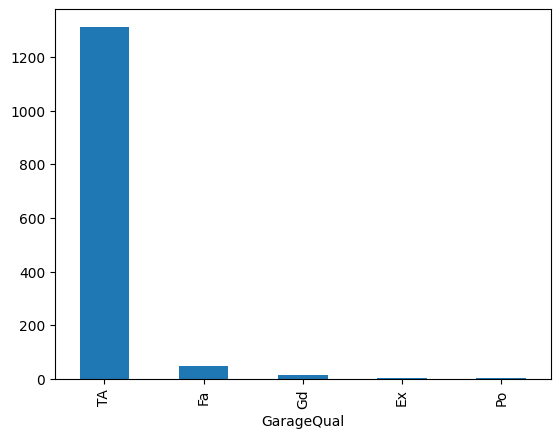

In [9]:
df["GarageQual"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'GarageQual')

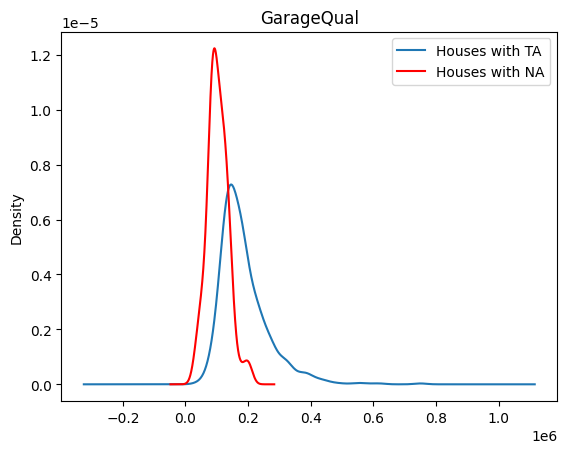

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [11]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [12]:
df['FireplaceQu'].fillna('Gd', inplace=True)

/tmp/ipython-input-3912738894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

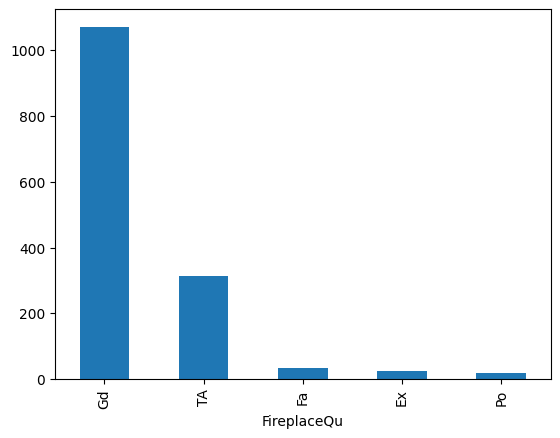

In [13]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

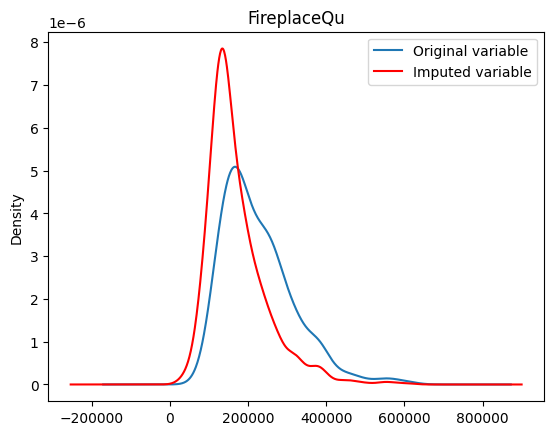

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(strategy = "most_frequent")

In [20]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [21]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)